<a href="https://colab.research.google.com/github/FayElhassan/Data-Science-and-Business-analytics-TSF/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Exploatoray Data Analysis
#Fay Majid Elhassan 


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

df=pd.read_csv('/content/SampleSuperstore (1).csv')



In [50]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:
df.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [52]:
df.dtypes


Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [53]:
df = df.drop(['Country' , 'City', 'State', 'Postal Code'], axis=1)
df.head(5)

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [75]:
df=df.rename(columns={"Sub-Category": "SubCategory"})

In [76]:
df.shape
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 9)


In [77]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [78]:
df.count()

Ship Mode      6921
Segment        6921
Region         6921
Category       6921
SubCategory    6921
Sales          6921
Quantity       6921
Discount       6921
Profit         6921
dtype: int64

In [79]:
df = df.drop_duplicates()
df.head(5)

,Ship Mode,Segment,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,West,Office Supplies,Art,7.280,4,0.0,1.9656


In [80]:
df.count()

Ship Mode      6921
Segment        6921
Region         6921
Category       6921
SubCategory    6921
Sales          6921
Quantity       6921
Discount       6921
Profit         6921
dtype: int64

In [81]:
print(df.isnull().sum())

Ship Mode      0
Segment        0
Region         0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64


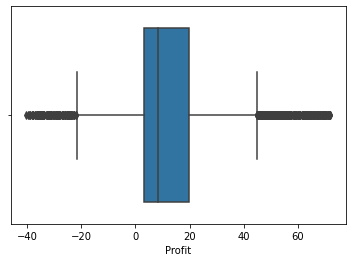

In [82]:
sns.boxplot(x=df['Profit'])

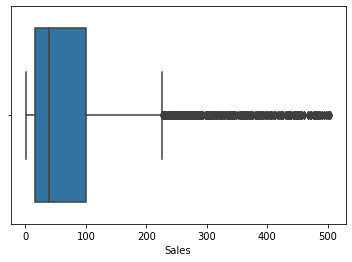

In [83]:
sns.boxplot(x=df['Sales'])

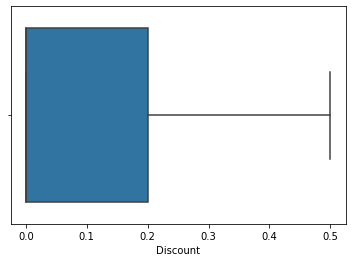

In [84]:
sns.boxplot(x=df['Discount'])

In [85]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sales       84.220
Quantity     3.000
Discount     0.200
Profit      16.668
dtype: float64


In [86]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(5884, 9)

Text(0.5, 0, 'SubCategory')

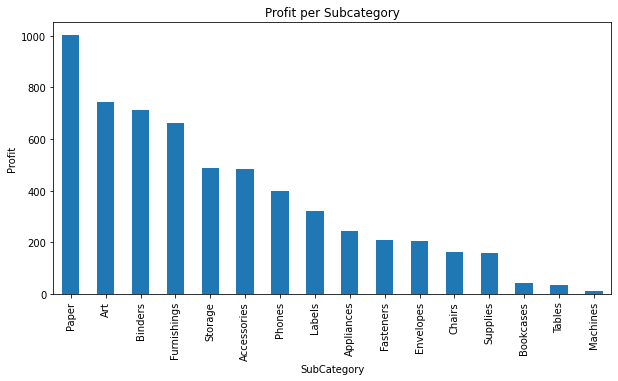

In [93]:
df.SubCategory.value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Profit per Subcategory")
plt.ylabel('Profit')
plt.xlabel('SubCategory')

as seen in the bar chart above we need to work on the bookcases,tables and machines

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.131082,0.076155,0.465784
Quantity,0.131082,1.000000,-0.029871,0.262043
Discount,0.076155,-0.029871,1.000000,-0.325223
Profit,0.465784,0.262043,-0.325223,1.000000


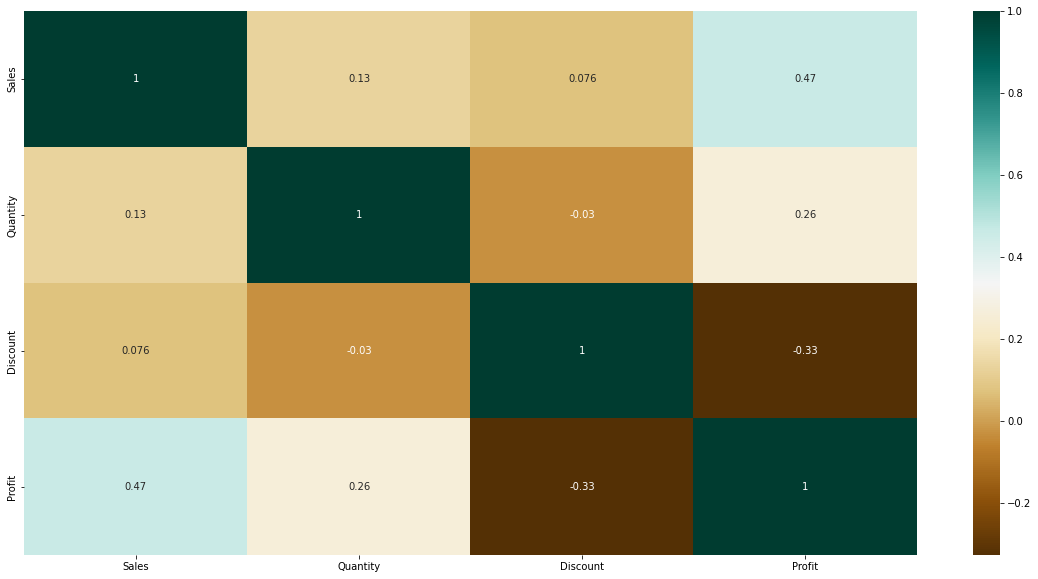

In [94]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c